In [1]:
%matplotlib inline
from helpers import *

In [2]:
dfs = {} # global data structure with parsed data
parse(dfs, "4 Node, 100K", "../results/scale-workers-4-71541")
parse(dfs, "4 Node, 1M",   "../results/scale-workers-1M-4-71537")
df = clean_df(dfs, ("4 Node, 1M", "DBMemoryGet", "4"))

... parsed: scale-workers-4-71541 ... parsed: scale-workers-1M-4-71537


## K-Means
First find *K*, the number of clusters in the data using the sum of the distances to the centroid. Then apply K-Means and color clusters.

[0 0 0 ..., 1 1 1]


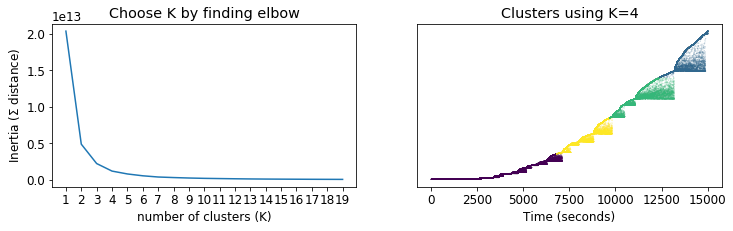

In [3]:
from sklearn.cluster import KMeans
fig, ax = plt.subplots(1, 2, figsize=(12, 3))

f1 = df['shift'].astype(int)      # feature 1 is the shifted timestamp (x-axis)
f2 = df['id'].astype(int)         # feature 2 is the key id (y-axis)
X  = np.matrix(zip(f1, f2))       # weight features equally

inertia = []                      # Graph 0: find optimal K using inertia as a metric
for n in range(1, 20):
    k = KMeans(n_clusters=n).fit(X)
    inertia.append(k.inertia_)
ax[0].plot(range(1, len(inertia)+1), inertia) 
ax[0].set_title("Choose K by finding elbow");
ax[0].set_xticks(range(1, len(inertia)+1));
ax[0].set_xlabel("number of clusters (K)")
ax[0].set_ylabel(r'Inertia ($\Sigma$ distance)')

k = KMeans(n_clusters=4).fit(X)   # Graph 1: run kmeans using K from graph 0
ax[1].scatter(df['shift'], df['id'], c=k.labels_, s=0.005)
ax[1].set_title("Clusters using K=4")
ax[1].set_xlabel("Time (seconds)")
ax[1].set_yticks([])
_ = ax[0].set_ylabel(r'Inertia ($\Sigma$ distance)')
print k.labels_

FAIL:
1. `K` is not known *a-priorio*
2. access regimes are different sizes

## DBSCAN

It kinda detects edges, but FAIL:
- Detected green edges are in the same group but the middle graph is what I want...
- What should we set `eps` to? (max distance between 2 samples in same neighborhood)
- What should we set `min_samples` to? (# of samples, i.e. total weight, for core point)

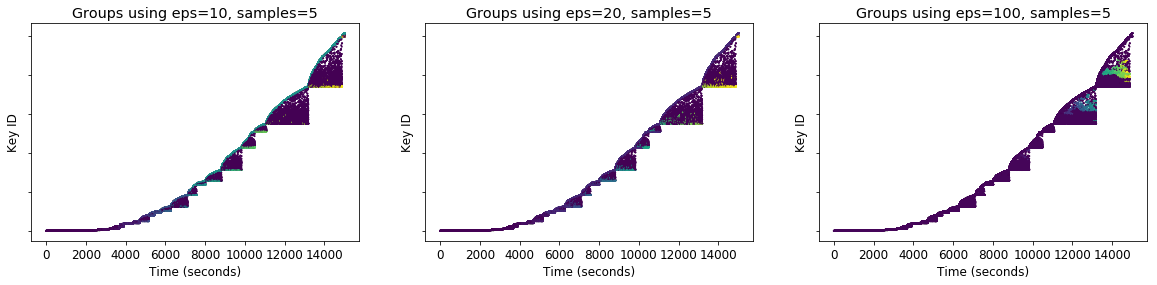

In [4]:
from sklearn.cluster import DBSCAN
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

axis = 0
for eps, nsamples in [(10, 5), (20, 5), (100, 5)]:
    dbscan = DBSCAN(eps=eps, min_samples=nsamples).fit(X)    
    ax[axis].scatter(df['shift'], df['id'], c=dbscan.labels_, s=1)
    ax[axis].set_xlabel("Time (seconds)")
    ax[axis].set_ylabel("Key ID")
    ax[axis].set_yticklabels([])
    ax[axis].set_title("Groups using eps=" + str(eps) + ", samples=" + str(nsamples))
    axis += 1